In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [52]:
data = np.loadtxt('data2.txt',delimiter=',')
data

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [66]:
y = np.c_[data[:,2]]
X = data[:,0:2]

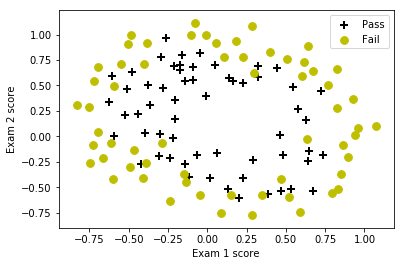

In [67]:
neg = data[:,2] == 0
pos = data[:,2] == 1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Pass')
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Fail')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.legend(frameon= True, fancybox = True)
plt.show()

In [68]:
#定义sigmoid函数
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [69]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data[:,0:2])
# 看看形状(特征映射后x有多少维了)
XX.shape

(118, 28)

In [70]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [71]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())



In [72]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox= True);

In [73]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [74]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.6931471805599454

[[-0.83007    -0.79127469 -0.75247939 ...,  0.99330939  1.03210469  1.0709    ]
 [-0.83007    -0.79127469 -0.75247939 ...,  0.99330939  1.03210469  1.0709    ]
 [-0.83007    -0.79127469 -0.75247939 ...,  0.99330939  1.03210469  1.0709    ]
 ..., 
 [-0.83007    -0.79127469 -0.75247939 ...,  0.99330939  1.03210469  1.0709    ]
 [-0.83007    -0.79127469 -0.75247939 ...,  0.99330939  1.03210469  1.0709    ]
 [-0.83007    -0.79127469 -0.75247939 ...,  0.99330939  1.03210469  1.0709    ]] [[-0.76974    -0.76974    -0.76974    ..., -0.76974    -0.76974    -0.76974   ]
 [-0.73140041 -0.73140041 -0.73140041 ..., -0.73140041 -0.73140041
  -0.73140041]
 [-0.69306082 -0.69306082 -0.69306082 ..., -0.69306082 -0.69306082
  -0.69306082]
 ..., 
 [ 1.03222082  1.03222082  1.03222082 ...,  1.03222082  1.03222082
   1.03222082]
 [ 1.07056041  1.07056041  1.07056041 ...,  1.07056041  1.07056041
   1.07056041]
 [ 1.1089      1.1089      1.1089     ...,  1.1089      1.1089      1.1089    ]]
[[-0.83007    -0

c:\python27\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


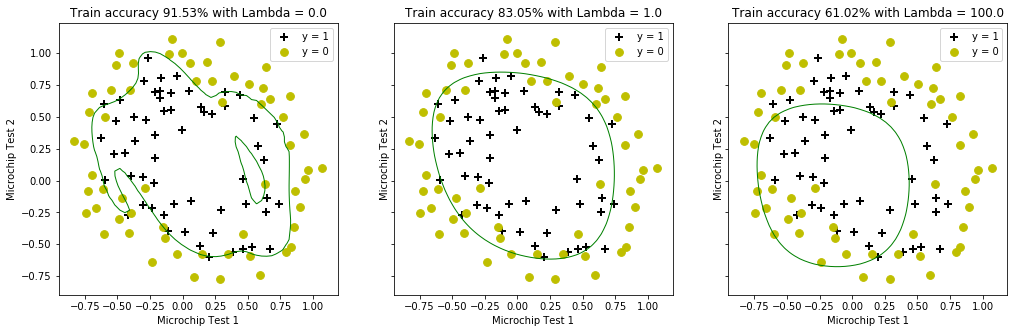

In [75]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    print xx1,xx2
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))